In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [2]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
X = df.iloc[:, 1:]
Y = df[0]

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder


X_encoded = OrdinalEncoder().fit_transform(X)
cnb = CategoricalNB().fit(X_encoded, Y)
y_pred = np.c_[cnb.predict_proba(X_encoded)][:, 1]
print(f"Sklearn CategoricalNB accuracy: {((y_pred>0.5)==(Y=='p')).sum() / df.shape[0]}")

Sklearn CategoricalNB accuracy: 0.9566715903495815


In [9]:
Y = df[df[0] == 'p'][0]
p0 = Y.shape[0] / df[0].shape[0]
z0 = np.log(p0) - np.log(1 - p0)

print(p0, z0)

0.48202855736090594 -0.07191675076714477


d:\code\mlhw\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


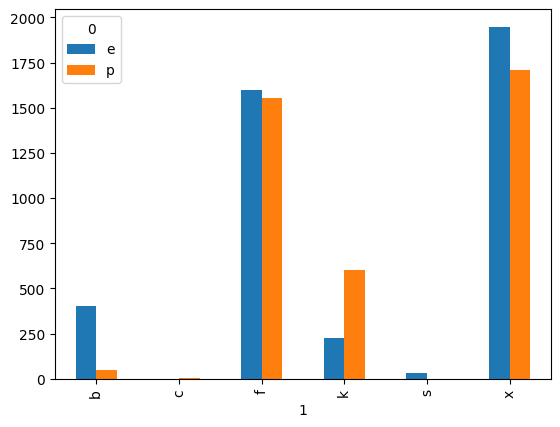

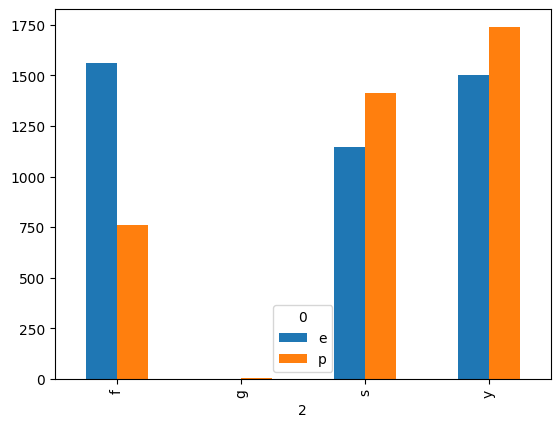

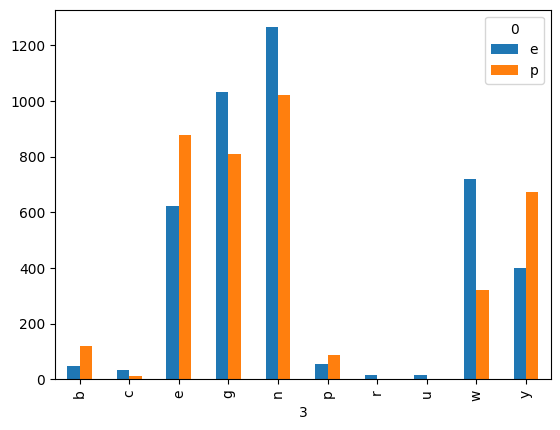

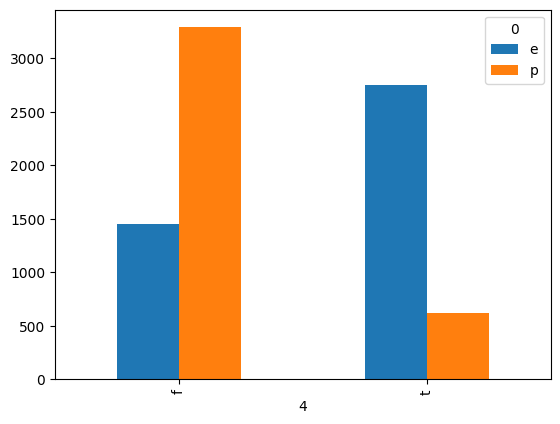

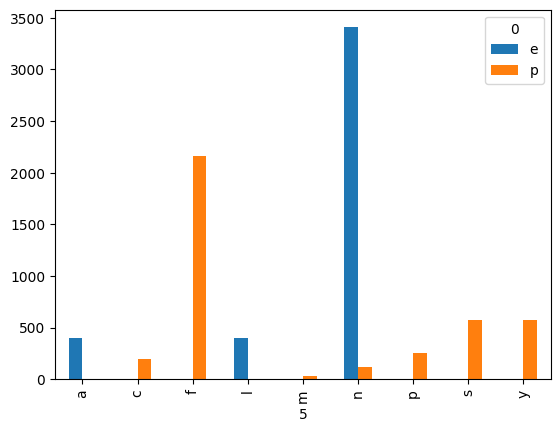

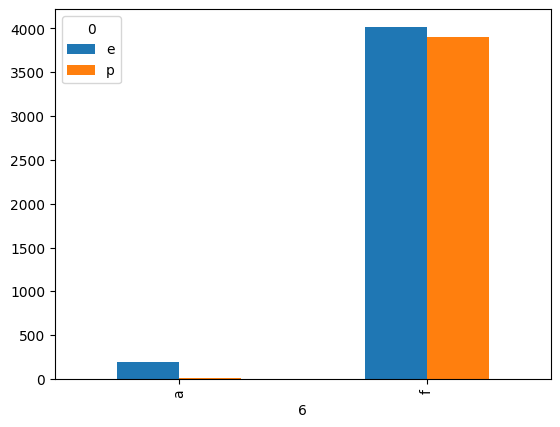

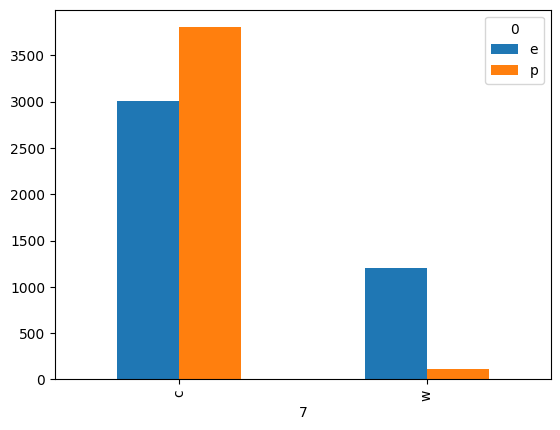

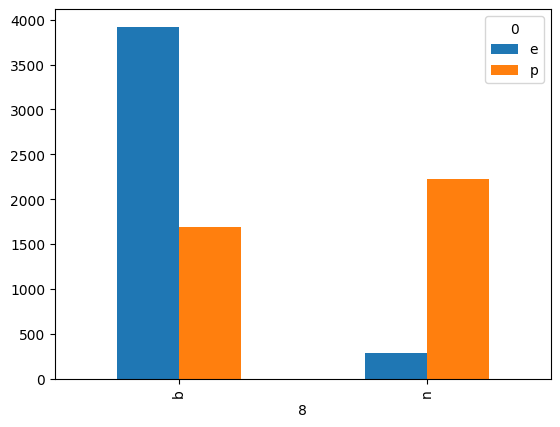

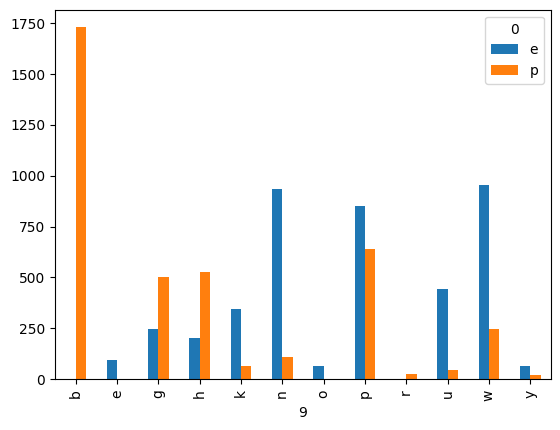

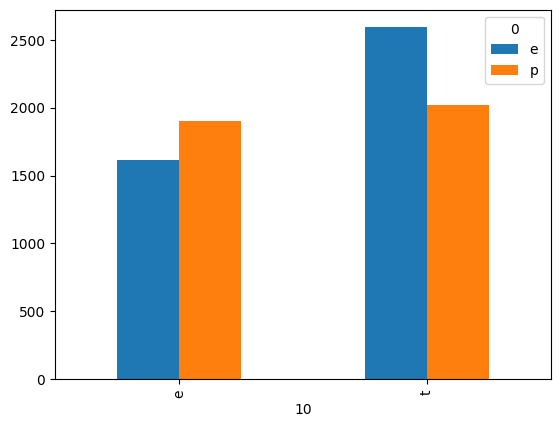

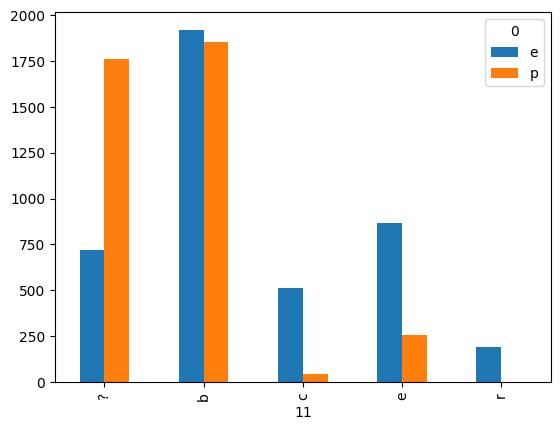

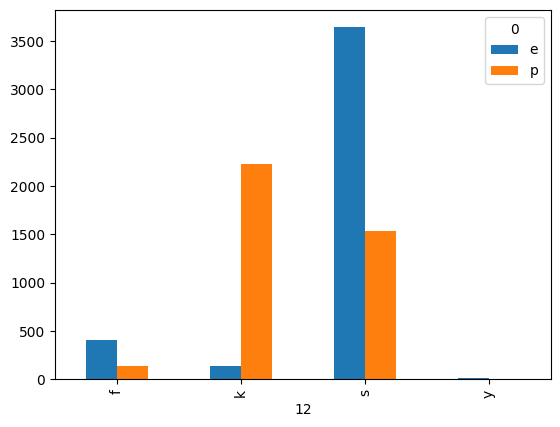

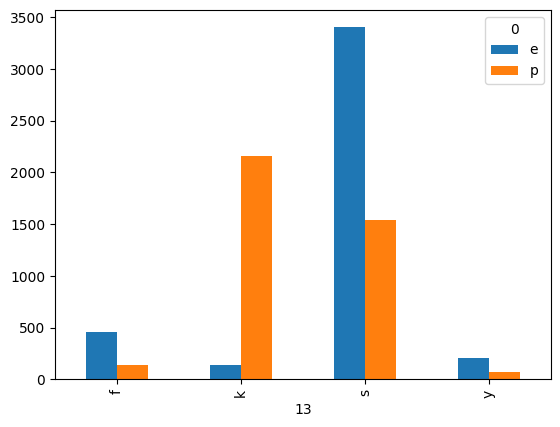

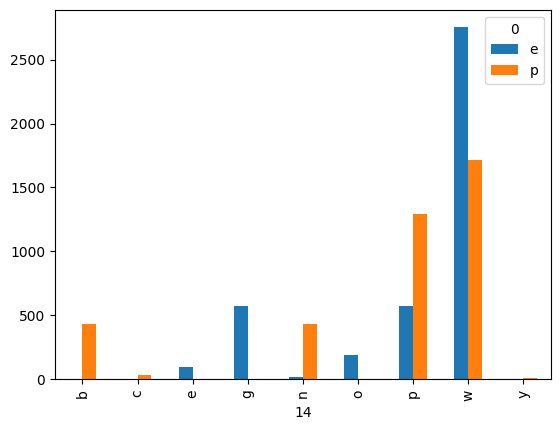

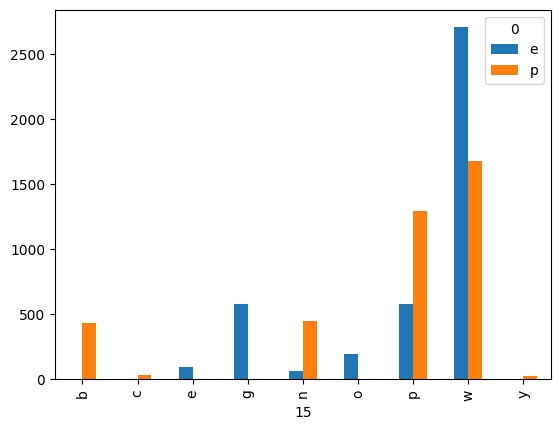

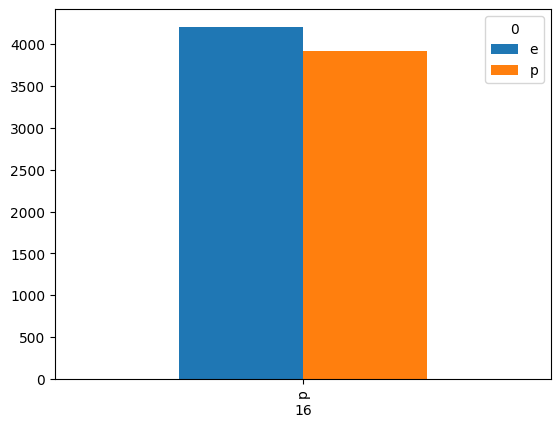

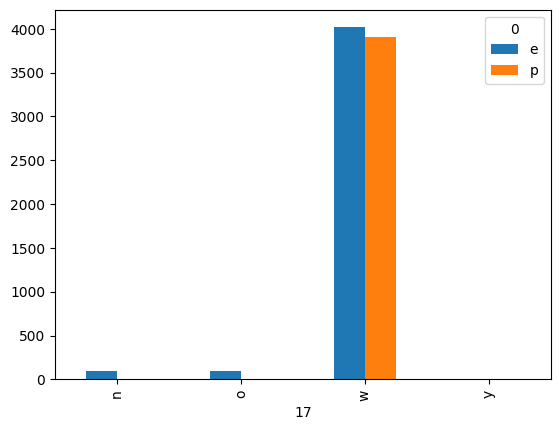

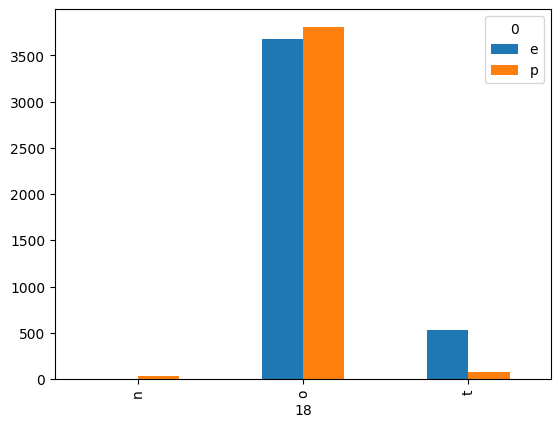

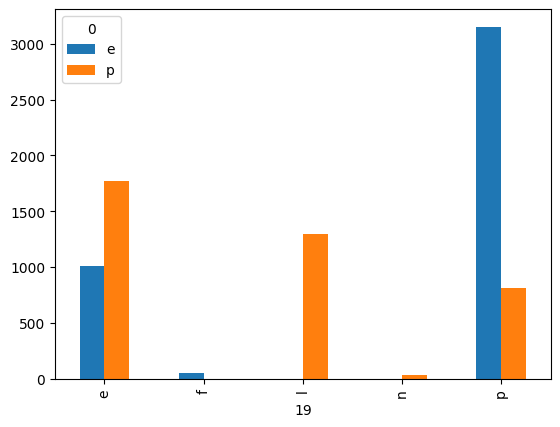

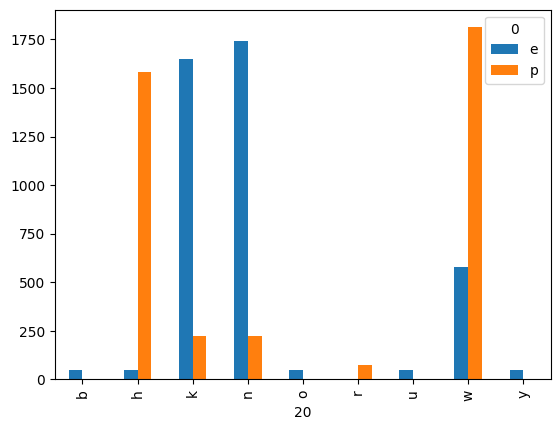

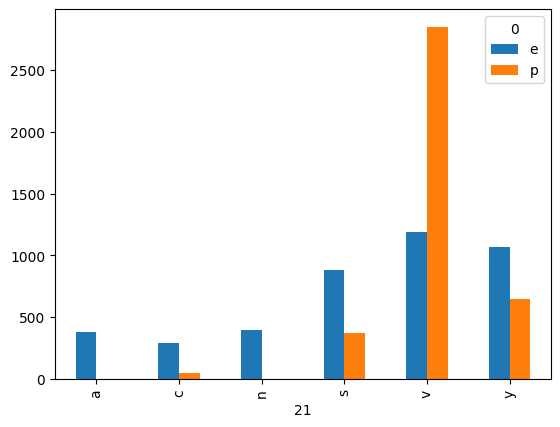

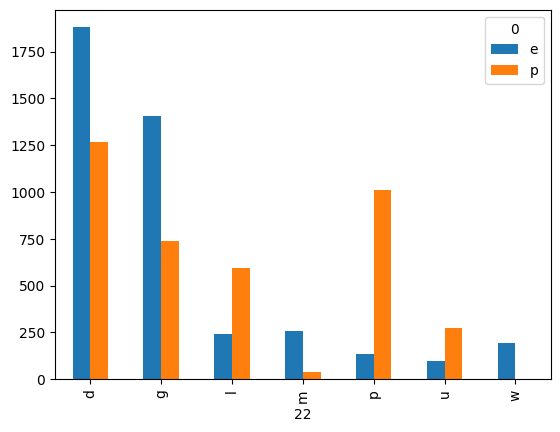

In [10]:
for i in df.columns[1:]:
    df[[i, 0]].value_counts().unstack().fillna(0).plot.bar()

Классификатор на основе частот

In [11]:
for i in df.columns[1:]:
    f = df[[i, 0]].value_counts().unstack().fillna(0)
    prob = (f['p'] + 1) / (f['p'] + f['e'] + 2)
    df[f"prob_{i}"] = df[i].map(lambda x: prob.at[x])
    df[f'pred_{i}'] = df[i].map(lambda x: 'p' if prob.at[x] > 0.5 else 'e')

In [17]:
for i in range(1,23):
    f = df.groupby(i)[0].value_counts().unstack().fillna(0)
    print(i, f.max(axis=1).sum() / df.shape[0])

1 0.5642540620384048
2 0.5805022156573116
3 0.5952732644017725
4 0.7439684884293452
5 0.9852289512555391
6 0.517971442639094
7 0.6159527326440177
8 0.7562776957163959
9 0.8050221565731167
10 0.5529295913343181
11 0.6459871984244214
12 0.7744953225012309
13 0.7661250615460364
14 0.7163958641063516
15 0.7144263909404235
16 0.517971442639094
17 0.5189561792220581
18 0.5381585425898572
19 0.7754800590841949
20 0.8680452978828164
21 0.7218119153126539
22 0.690300344657804


In [18]:
for i in df.columns[1:]:
    f = df[[i, 0]].value_counts().unstack().fillna(0)
    prob = (f['p'] + 1) / (f['p'] + f['e'] + 2)
    logit = np.log(prob) - np.log(1 - prob) - z0
    df[f"z_{i}"] = df[i].map(lambda x: logit.at[x])

In [19]:
X = df.iloc[:, 23:]

In [20]:
P = X.sum(axis=1) + z0
P = 1 / (1 + np.exp(-P))

In [22]:
from sklearn.linear_model import LogisticRegression

Y = df[0]
lr = LogisticRegression().fit(X, Y)
P1 = np.c_[lr.predict_proba(X)][:, 1]

In [23]:
print(f"Naive Bayes accuracy: {((P>0.5)==(df[0]=='p')).sum() / df.shape[0]}")
print(f"LogisticRegression accuracy: {((P1>0.5)==(Y=='p')).sum() / df.shape[0]}")

Naive Bayes accuracy: 0.956548498276711
LogisticRegression accuracy: 1.0
